# eye contour vis

# imports

In [3]:
import keras
from keras.layers import ReLU
from keras.utils.generic_utils import CustomObjectScope


def load_modules():
    import sys
    import warnings
    import numpy as np
    sys.path.append("../../../")
    warnings.filterwarnings("ignore")
    np.set_printoptions(precision=6, suppress=True)
    
    %run ../../../ac/images/loader.py
    %run ../../../ac/images/filters/filters.py
    %run ../../../ac/common/images.py
    %run ../../../ac/visualizer/plotter.py
    %run ../../../ai/model/iris/deeplab/iris.py
    %run ../../../ai/model/iris/simple/iris.py
    %run ../../../ai/libs/keras/models/loader.py
    
load_modules()

Using TensorFlow backend.


# load model

In [1]:
def load_deeplab_model():
    model_path = "/home/chy/dev-bench/auto-catch/notes/research/eye-contour/iris-pilot.json"
    weight_path = "/home/chy/archive-model/incubator/iris-contour/iris-01-0.0000023.hdf5"

    with CustomObjectScope({
        'relu6': relu6,
        'BilinearUpsampling': BilinearUpsampling
    }):
        model = KerasLoader.load_model(model_path, weight_path)
    return model

def load_simple_model():
    model_path = "/home/chy/dev-bench/auto-catch/notes/research/eye-contour/iris-pilot-simple.json"
    weight_path = "/home/chy/archive-model/incubator/iris-contour/iris-08-3.9389895.hdf5"
    model = KerasLoader.load_model(model_path, weight_path)
    return model

def load_unet_model():
    model_path = "/home/chy/dev-bench/auto-catch/notes/research/eye-contour/iris-pilot-uiris.json"
    weight_path = "/home/chy/archive-model/incubator/iris-contour/iris-u-01-0.5065930.hdf5"
    model = KerasLoader.load_model(model_path, weight_path)
    return model

def load_deepeye_model():
    # https://github.com/keras-team/keras/issues/5298 
    # lambda layer 내부에 import tensorflow as tf 정의하면 수정됨
    model_path = "/home/chy/dev-bench/auto-catch/notes/research/eye-contour/iris-deepeye-tf.json"
    weight_path = "/home/chy/archive-model/incubator/iris-contour/deepeye-04-0.0336143.hdf5"
    model = KerasLoader.load_model(model_path, weight_path)
    return model

In [4]:
im = load_deepeye_model()

# load test samples

In [11]:
def get_img(name, ext="jpg"):
    base_path = "/home/chy/dev-bench/auto-catch/notes/research/eye-contour/test-samples/"
    img_path = "{}/{}.{}".format(base_path, name, ext)
    img = load_image(img_path)
    img = resize(img, (64, 64))
    return img

In [12]:
s01 = get_img("tc01")
x01 = get_img("x3500")
x02 = get_img("x3507")
s02 = get_img("tc02", "png")

# vis

In [36]:
def vis_dl(img):
    inputs = np.array([rgb_to_bgr(img)])
    pred = im.predict(inputs)
    
    class_map = pred[0]
    class_map = np.argmax(class_map, axis=-1)
    class_map = np.reshape(class_map, (112, 112, 1))
    # class_map *= 255
    print(class_map.shape)
    print( (class_map > 0).sum() )
    show_image(class_map, fig_size=(3,3))
    show_image(img, fig_size=(3, 3))
    # draw_ellipse_on(ax, (cx, cy), w, h, phi)
    
def vis_sim(img):
    inputs = np.array([rgb_to_bgr(img)])
    pred = im.predict(inputs)
    # cx, cy, w, h, phi = pred[0]
    cx, cy = pred[0]
    print(cx, cy)
    
    ax = show_image(img, fig_size=(3, 3))
    draw_point(ax, cx, cy)
    
def vis_u(img):
    inputs = np.array([rgb_to_bgr(img)])
    pred = im.predict(inputs)
    
    class_map = np.squeeze(pred)
    class_map = class_map[:,1]
    class_map = class_map * (class_map > 0.49)
    class_map = np.reshape(class_map, (112, 112, 1))
    show_image(img, fig_size=(3, 3))
    show_image(class_map, fig_size=(3, 3))
    
def vis_de(img):
    inputs = np.array([rgb_to_bgr(img)])
    pred = im.predict(inputs)
    
    class_map = np.squeeze(pred)
    class_map = class_map[:,:,1]
    print(class_map.shape)
    class_map = np.reshape(class_map, (64, 64, 1))
    show_image(img, fig_size=(3, 3))
    show_image(class_map, fig_size=(3, 3))

(64, 64)


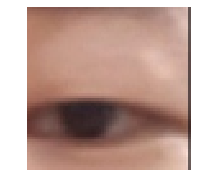

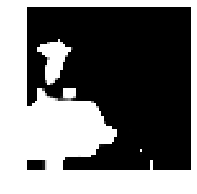

In [43]:
vis_de(x02)